# Part 1: Analysis of Brownsville.csv, years 2014-2021

Removing duplicate requests on the Brownsville dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
rdbrownsville = pd.read_csv("brownsville.csv", parse_dates=["StatusDate"])
pd.set_option('display.max_colwidth', -1)
rdbrownsville.head()

<ipython-input-2-d20f5645d4b5>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Zip,Borough,BoroughID,BuildingID,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,...,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,11233,BROOKLYN,3,219263,14570531,6977738,91,APARTMENT,541,BATHROOM,...,65,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2014-07-31,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
1,11212,BROOKLYN,3,283890,14618845,6996145,91,APARTMENT,546,KITCHEN,...,9,PLUMBING,68,WATER SUPPLY,2564,NO WATER,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
2,11212,BROOKLYN,3,283890,14618846,6996145,91,APARTMENT,545,ENTRANCE/FOYER,...,56,DOOR/WINDOW,333,DOOR,2664,BROKEN OR MISSING,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
3,11212,BROOKLYN,3,283890,14618847,6996145,91,APARTMENT,542,BEDROOM,...,63,UNSANITARY CONDITION,375,MOLD,2817,NaN,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
4,11233,BROOKLYN,3,330347,14585091,6982717,91,APARTMENT,543,ENTIRE APARTMENT,...,59,HEAT/HOT WATER,348,APARTMENT ONLY,2833,NO HEAT AND NO HOT WATER,2,CLOSE,2014-08-05,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."


In [3]:
rdbrownsville.drop_duplicates(subset=["MajorCategory", "MinorCategory"], keep='first', inplace=False)

,Zip,Borough,BoroughID,BuildingID,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,...,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,11233,BROOKLYN,3,219263,14570531,6977738,91,APARTMENT,541,BATHROOM,...,65,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2014-07-31,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
1,11212,BROOKLYN,3,283890,14618845,6996145,91,APARTMENT,546,KITCHEN,...,9,PLUMBING,68,WATER SUPPLY,2564,NO WATER,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
2,11212,BROOKLYN,3,283890,14618846,6996145,91,APARTMENT,545,ENTRANCE/FOYER,...,56,DOOR/WINDOW,333,DOOR,2664,BROKEN OR MISSING,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
3,11212,BROOKLYN,3,283890,14618847,6996145,91,APARTMENT,542,BEDROOM,...,63,UNSANITARY CONDITION,375,MOLD,2817,NaN,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
4,11233,BROOKLYN,3,330347,14585091,6982717,91,APARTMENT,543,ENTIRE APARTMENT,...,59,HEAT/HOT WATER,348,APARTMENT ONLY,2833,NO HEAT AND NO HOT WATER,2,CLOSE,2014-08-05,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37950,11212,BROOKLYN,3,380139,15980886,7716968,91,APARTMENT,546,KITCHEN,...,8,APPLIANCE,321,MICROWAVE,2619,BROKEN OR MISSING,2,CLOSE,2015-12-01,The Department of Housing Preservation and Development inspected the following conditions. A Section 8 Failure was issued. Both the tenant and the property owner will receive a notice in the mail regarding the details of the Failure and the resulting action by the Agency.
44325,11233,BROOKLYN,3,231197,10027327,5060448,20,APARTMENT,68,ENTIRE APARTMENT,...,10,ELECTRIC,70,ELECTRIC-SUPPLY,2457,NO SUPPLY TO APARTMENT,2,CLOSE,2016-03-18,"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint."
118976,11233,BROOKLYN,3,374425,3348129,2170316,24,PUBLIC PAR,187,BASEMENT,...,13,NONCONST,97,ILLEGAL,830,APARTMENT CREATED IN CELLAR/ BASEMENT/ ATTIC,2,CLOSE,2004-04-22,"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint."
119063,11233,BROOKLYN,3,374425,3343230,2167196,24,PUBLIC PAR,78,FRONT AREAWAY,...,11,GENERAL,87,STAIRS,770,BROKEN,2,CLOSE,2004-01-16,The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.


In [4]:
rdbrownsville.dropna()

,Zip,Borough,BoroughID,BuildingID,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,...,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,11233,BROOKLYN,3,219263,14570531,6977738,91,APARTMENT,541,BATHROOM,...,65,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2014-07-31,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
1,11212,BROOKLYN,3,283890,14618845,6996145,91,APARTMENT,546,KITCHEN,...,9,PLUMBING,68,WATER SUPPLY,2564,NO WATER,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
2,11212,BROOKLYN,3,283890,14618846,6996145,91,APARTMENT,545,ENTRANCE/FOYER,...,56,DOOR/WINDOW,333,DOOR,2664,BROKEN OR MISSING,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
4,11233,BROOKLYN,3,330347,14585091,6982717,91,APARTMENT,543,ENTIRE APARTMENT,...,59,HEAT/HOT WATER,348,APARTMENT ONLY,2833,NO HEAT AND NO HOT WATER,2,CLOSE,2014-08-05,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
5,11212,BROOKLYN,3,184244,15256017,7370258,91,APARTMENT,541,BATHROOM,...,65,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2015-03-22,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143682,11212,BROOKLYN,3,309623,21541551,10701702,91,APARTMENT,546,KITCHEN,...,8,APPLIANCE,61,REFRIGERATOR,2622,BROKEN DOOR SEAL,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143683,11212,BROOKLYN,3,309623,21541552,10701702,91,APARTMENT,543,ENTIRE APARTMENT,...,65,WATER LEAK,381,SLOW LEAK,2831,AT WALL OR CEILING,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143684,11212,BROOKLYN,3,309623,21541553,10701702,91,APARTMENT,543,ENTIRE APARTMENT,...,28,PAINT/PLASTER,198,WALL,1364,BULGING/HOLE/CRACKED,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143685,11233,BROOKLYN,3,364106,21541604,10701726,92,BUILDING-WIDE,550,BUILDING-WIDE,...,63,UNSANITARY CONDITION,374,GARBAGE/RECYCLING STORAGE,2816,MISSING OR INADEQUATE CANS/LID,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.


Loaded up libraries, dataset, removed duplicates and removed N/A rows. 

-----------------------

Checking the Major Categories column

In [5]:
sorted_cat = rdbrownsville.sort_values("MajorCategory", ascending = True)

In [6]:
rdbrownsville["MajorCategory"].value_counts()

HEAT/HOT WATER          40541
UNSANITARY CONDITION    22167
PAINT/PLASTER           15047
PLUMBING                14308
DOOR/WINDOW             11524
WATER LEAK              9077 
ELECTRIC                7831 
GENERAL                 6671 
FLOORING/STAIRS         6457 
SAFETY                  4990 
APPLIANCE               4246 
OUTSIDE BUILDING        648  
ELEVATOR                96   
HEATING                 74   
NONCONST                9    
CONSTRUCTION            1    
Name: MajorCategory, dtype: int64

Text(0.5, 0, 'Issue')

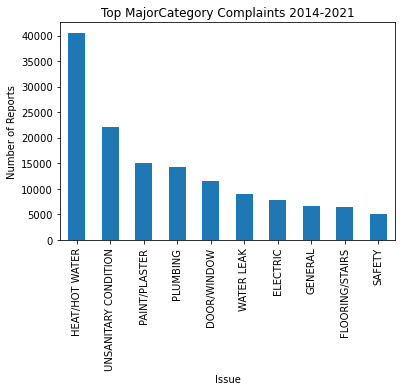

In [7]:
majorcat_values = rdbrownsville["MajorCategory"].value_counts().head(10)
majorcat_values.plot(kind = "bar")
plt.title("Top MajorCategory Complaints 2014-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue")

After cleaning and ordering, the top categories in the MajorCategory column are "HEAT/HOT WATER", "UNSANITARY CONDITION", "PAINT/PLATER", "PLUMBING" and "DOOR/WINDOW". Some of these are vague or unclear, need to check those against the MinorCategory column.  Made a bar chart to show all major categories. 

--------------

Checking the Minor Category column.

In [8]:
mincat = rdbrownsville.sort_values(by='MinorCategory').reset_index(drop=True)

In [9]:
rdbrownsville["MinorCategory"].value_counts().head(10)

ENTIRE BUILDING    22995
APARTMENT ONLY     17546
PESTS              12176
WALL               7662 
MOLD               7019 
CEILING            6785 
DOOR               6075 
FLOOR              5987 
BASIN/SINK         4441 
HEAVY FLOW         4278 
Name: MinorCategory, dtype: int64

Text(0.5, 0, 'Issue Description')

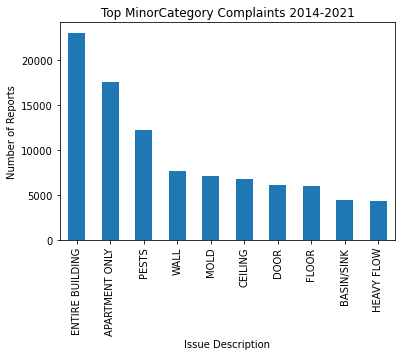

In [10]:
minorcat_values = rdbrownsville["MinorCategory"].value_counts().head(10)
minorcat_values.plot(kind = "bar")
plt.title("Top MinorCategory Complaints 2014-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue Description")

Checking the Minor Category, the top issues are "ENTIRE BUILDING", "APARTMENT ONLY", "PESTS", "WALL" and "MOLD". Some of these are unclear("ENTIRE BUILDING", APARTMENT ONLY"), need to clarify those. Made a bar chart with the top 10 categories, as doing all of them would make the chart hard to read.

------------------

Checking building IDs to see which is the most frequently show in the dataset.

In [11]:
rdbrownsville["BuildingID"].value_counts()

808361    5152
309623    1463
329071    1426
287185    1421
334864    1324
          ... 
992802    1   
863414    1   
349804    1   
307281    1   
362545    1   
Name: BuildingID, Length: 4653, dtype: int64

Text(0.5, 0, 'Building ID')

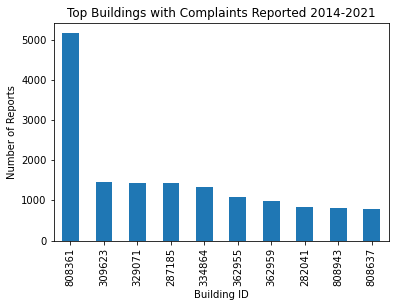

In [12]:
build_values = rdbrownsville["BuildingID"].value_counts().head(10)
build_values.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported 2014-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
329071 - 210 Lott Avenue<br>
287185 - 1064 East New York Avenue<br>
334864 - 706 MacDonough Street<br>
362955 - 9401 Seaview Avenue<br>
362959<br>
282041<br>
808943<br>
808637<br>

------------------------------------------

Status descriptions will be analyzed here. 

In [13]:
rdbrownsville["StatusDescription"].value_counts()

The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                                                             48134
The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.                                                                                                                                                                                        30587
The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint.                                        

There are 21 unique status description. The top description, with 48134 hits, is that the Department of Housing Preservation found no violations and the matter had been closed.<br>
Second on the list at 30587 hits was that the DHP found violations and issued.<br>
Third most common (23654) was that DHP was unable to gain access to the "conditions".<br>
Fourth (9513) is that it is a building-wide issue that has been resolved. The next description (8049) had an almost identical text, apart from a few words. I'm going to count it together, which gives us a total of 17562.<br>
Fifth (7755) is DHP recieved complaints of no heat/hot water, but had confirmed it had been restored and closed the matter. 


----------------------------

In this section, I will show the top buildings with violations in this timeframe.

In [14]:
bv_buildstatus = rdbrownsville[["BuildingID", "StatusDescription"]]

In [15]:
bv_sd = bv_buildstatus[(bv_buildstatus.StatusDescription == 'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.')]

Text(0.5, 0, 'Building ID')

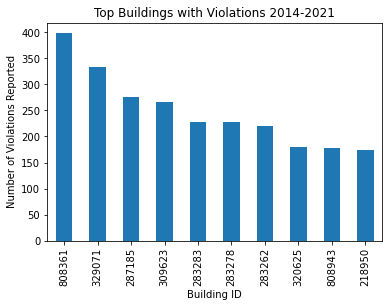

In [16]:
bv_sd_counts = bv_sd["BuildingID"].value_counts().head(10)
bv_sd_counts.plot(kind = "bar")
plt.title("Top Buildings with Violations 2014-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2014 and 2021 are:<br>
808361 - 1711 Fulton Street<br>
329071 - 210 Lott Avenue<br>
287185 - 1064 East New York Avenue<br>
309623 - 7 Hegeman Avenue<br>
283283<br>
283278<br>
283262<br>
320625<br>
808943<br>
218950<br>

------------

In [17]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
rdbrownsville['StatusDate'] = pd.to_datetime(rdbrownsville['StatusDate'])
rdbrownsville["StatusDateMonth"] = rdbrownsville["StatusDate"].dt.month
month_counts = rdbrownsville["StatusDateMonth"].value_counts()
month_counts.index = month_counts.index.map(month)
month_counts

December     17328
January      15465
November     15362
February     15362
March        13902
October      12255
August       10215
April        10203
September    9616 
July         8274 
May          7911 
June         7785 
Name: StatusDateMonth, dtype: int64

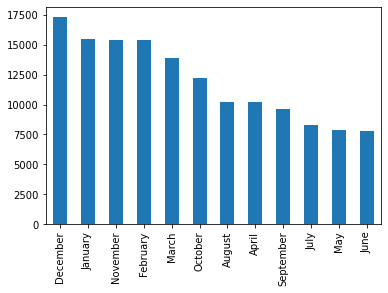

In [18]:
month_counts.plot(kind = "bar")

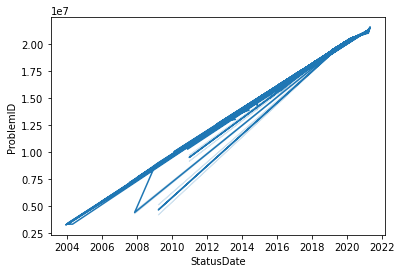

In [19]:
sns.lineplot(x = "StatusDate", y = "ProblemID", data = rdbrownsville, sort=False)

------------------------

In [20]:
rdbrownsville.head()

,Zip,Borough,BoroughID,BuildingID,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,...,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription,StatusDateMonth
0,11233,BROOKLYN,3,219263,14570531,6977738,91,APARTMENT,541,BATHROOM,...,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2014-07-31,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,7.0
1,11212,BROOKLYN,3,283890,14618845,6996145,91,APARTMENT,546,KITCHEN,...,PLUMBING,68,WATER SUPPLY,2564,NO WATER,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,8.0
2,11212,BROOKLYN,3,283890,14618846,6996145,91,APARTMENT,545,ENTRANCE/FOYER,...,DOOR/WINDOW,333,DOOR,2664,BROKEN OR MISSING,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,8.0
3,11212,BROOKLYN,3,283890,14618847,6996145,91,APARTMENT,542,BEDROOM,...,UNSANITARY CONDITION,375,MOLD,2817,NaN,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,8.0
4,11233,BROOKLYN,3,330347,14585091,6982717,91,APARTMENT,543,ENTIRE APARTMENT,...,HEAT/HOT WATER,348,APARTMENT ONLY,2833,NO HEAT AND NO HOT WATER,2,CLOSE,2014-08-05,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",8.0


--------------------------

## Part 2: 5 Year Analysis of Brownsville.csv, years 2016-2021

Filtered the years down to a five year timeframe (between the years 2016 and 2021).

In [21]:
bv_5years = rdbrownsville[(rdbrownsville['StatusDate'] > '2016-01-01') & (rdbrownsville['StatusDate'] < '2021-05-01')]

-----------------

Checking the Major Categories column, now for the 5 year timeframe.

In [22]:
bv_5years["MajorCategory"].value_counts()

HEAT/HOT WATER          31056
UNSANITARY CONDITION    16932
PAINT/PLASTER           10974
PLUMBING                10813
DOOR/WINDOW             8912 
WATER LEAK              6647 
ELECTRIC                5891 
GENERAL                 5169 
FLOORING/STAIRS         4856 
SAFETY                  3809 
APPLIANCE               3502 
OUTSIDE BUILDING        531  
ELEVATOR                78   
HEATING                 2    
Name: MajorCategory, dtype: int64

Text(0.5, 0, 'Issue')

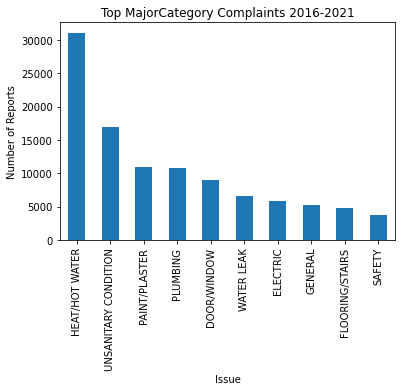

In [23]:
majorcat_values_5 = bv_5years["MajorCategory"].value_counts().head(10)
majorcat_values_5.plot(kind = "bar")
plt.title("Top MajorCategory Complaints 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue")

The top 5 categories in the MajorCategory column in the last five years are "HEAT/HOT WATER", "UNSANITARY CONDITION", "PAINT/PLATER", "PLUMBING" and "DOOR/WINDOW".


---------------------------

Checking the Minor Category column for the five year timeframe.

In [24]:
mincat_5 = bv_5years.sort_values(by='MinorCategory').reset_index(drop=True)

In [25]:
bv_5years["MinorCategory"].value_counts().head(10)

ENTIRE BUILDING    17551
APARTMENT ONLY     13505
PESTS              9481 
WALL               5608 
MOLD               5193 
CEILING            4883 
DOOR               4780 
FLOOR              4500 
BASIN/SINK         3378 
HEAVY FLOW         3097 
Name: MinorCategory, dtype: int64

Text(0.5, 0, 'Issue Description')

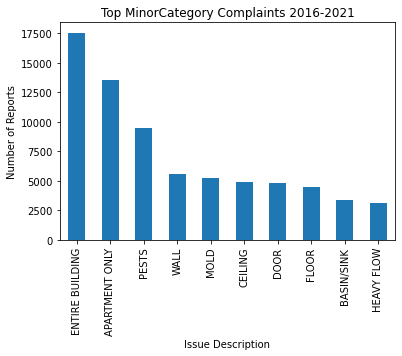

In [26]:
minorcat_values_5 = bv_5years["MinorCategory"].value_counts().head(10)
minorcat_values_5.plot(kind = "bar")
plt.title("Top MinorCategory Complaints 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue Description")

In the Minor Category column, the top issues in the last five years are "ENTIRE BUILDING", "APARTMENT ONLY", "PESTS", "WALL" and "MOLD".

-------------------

Checking building IDs to see which is the most frequently show in the last five years.

In [27]:
bv_5years["BuildingID"].value_counts()

808361    4392
309623    1344
329071    1331
334864    912 
287185    798 
         ...  
334662    1   
198250    1   
232276    1   
284222    1   
984704    1   
Name: BuildingID, Length: 4042, dtype: int64

Text(0.5, 0, 'Building ID')

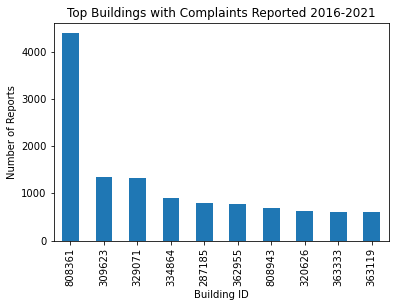

In [28]:
build_values = bv_5years["BuildingID"].value_counts().head(10)
build_values.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
329071 - 210 Lott Avenue<br>
334864 - 706 MacDonough Street<br>
287185 - 1064 East New York Avenue<br>
362955 - 9401 Seaview Avenue<br>
808943<br>
320626<br>
363333<br>
363119<br>

-------------

In this section, I will show the top buildings with violations in the 5 year timeframe.

In [29]:
bv_buildstatus5 = bv_5years[["BuildingID", "StatusDescription"]]

In [30]:
bv_sd5 = bv_buildstatus5[(bv_5years.StatusDescription == 'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.')]

Text(0.5, 0, 'Building ID')

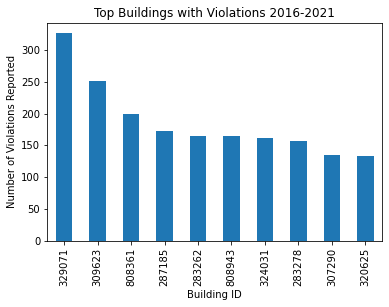

In [31]:
bv_sd_counts5 = bv_sd5["BuildingID"].value_counts().head(10)
bv_sd_counts5.plot(kind = "bar")
plt.title("Top Buildings with Violations 2016-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2016 and 2021 are:<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
808361 - 1711 Fulton Street<br>
287185 - 1064 East New York Avenue<br>
283262<br>
808943<br>
324031<br>
283278<br>
307290<br>
320625<br>

-----------------

-----------------

In [48]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_5years['StatusDate'] = pd.to_datetime(bv_5years['StatusDate'])
bv_5years["StatusDateMonth"] = bv_5years["StatusDate"].dt.month
month_counts5 = bv_5years["StatusDateMonth"].value_counts()
month_counts5.index = month_counts5.index.map(month)
month_counts5

<ipython-input-48-2f05e8046cbd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv_5years['StatusDate'] = pd.to_datetime(bv_5years['StatusDate'])
<ipython-input-48-2f05e8046cbd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv_5years["StatusDateMonth"] = bv_5years["StatusDate"].dt.month


January      12700
December     12414
February     12200
March        11631
November     10886
October      8701 
April        8184 
August       6806 
July         6626 
June         6362 
May          6332 
September    6330 
Name: StatusDateMonth, dtype: int64

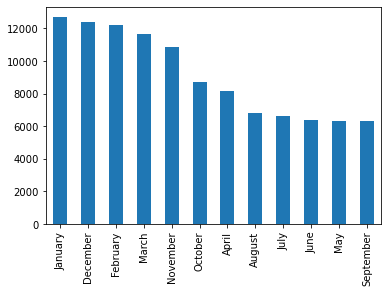

In [49]:
month_counts5.plot(kind = "bar")

## Part 3: 2 Year Analysis of Brownsville.csv, years 2019-2021

Filtered the years down to a five year timeframe (between the years 2019 and 2021).

In [33]:
bv_2years = rdbrownsville[(rdbrownsville['StatusDate'] > '2019-01-01') & (rdbrownsville['StatusDate'] < '2021-05-01')]

----------------

Checking the Major Categories column, now for the 5 year timeframe.

In [34]:
bv_5years["MajorCategory"].value_counts()

HEAT/HOT WATER          31056
UNSANITARY CONDITION    16932
PAINT/PLASTER           10974
PLUMBING                10813
DOOR/WINDOW             8912 
WATER LEAK              6647 
ELECTRIC                5891 
GENERAL                 5169 
FLOORING/STAIRS         4856 
SAFETY                  3809 
APPLIANCE               3502 
OUTSIDE BUILDING        531  
ELEVATOR                78   
HEATING                 2    
Name: MajorCategory, dtype: int64

Text(0.5, 0, 'Issue')

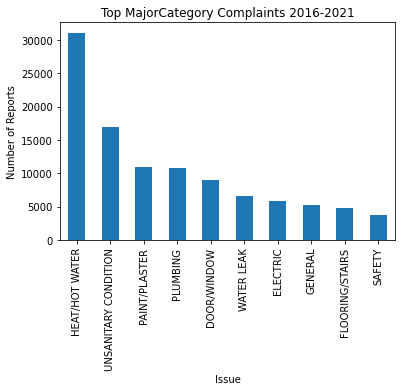

In [35]:
majorcat_values_5 = bv_5years["MajorCategory"].value_counts().head(10)
majorcat_values_5.plot(kind = "bar")
plt.title("Top MajorCategory Complaints 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue")

The top 5 categories in the MajorCategory column in the last five years are "HEAT/HOT WATER", "UNSANITARY CONDITION", "PAINT/PLATER", "PLUMBING" and "DOOR/WINDOW".

--------------

Checking the Minor Category column for the two year timeframe.

In [36]:
mincat_2 = bv_2years.sort_values(by='MinorCategory').reset_index(drop=True)

In [37]:
bv_2years["MinorCategory"].value_counts().head(10)

ENTIRE BUILDING    7017
APARTMENT ONLY     5581
PESTS              4002
MOLD               2055
WALL               1918
DOOR               1813
CEILING            1688
FLOOR              1450
BASIN/SINK         1215
HEAVY FLOW         1171
Name: MinorCategory, dtype: int64

Text(0.5, 0, 'Issue Description')

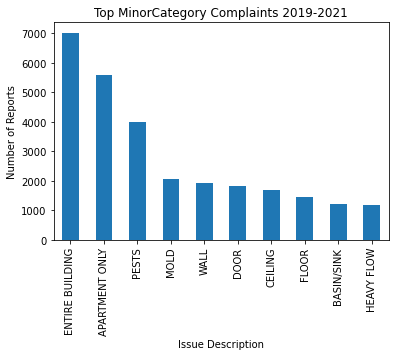

In [38]:
minorcat_values = bv_2years["MinorCategory"].value_counts().head(10)
minorcat_values.plot(kind = "bar")
plt.title("Top MinorCategory Complaints 2019-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Issue Description")

In the Minor Category column, the top issues in the last two years are "ENTIRE BUILDING", "APARTMENT ONLY", "PESTS", "WALL" and "MOLD".

---------------------------

Checking building IDs to see which is the most frequently show in the last two years.

In [39]:
bv_2years["BuildingID"].value_counts()

808361    1614
309623    665 
329071    535 
231212    411 
362955    376 
         ...  
287645    1   
377865    1   
975290    1   
306276    1   
307178    1   
Name: BuildingID, Length: 2584, dtype: int64

Text(0.5, 0, 'Building ID')

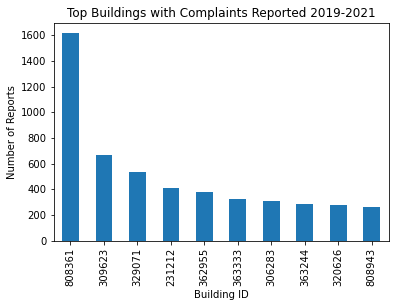

In [40]:
build_values = bv_2years["BuildingID"].value_counts().head(10)
build_values.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported 2019-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
329071 - 210 Lott Avenue<br>
231212<br>
362955 - 9401 Seaview Avenue<br>
363333<br>
306283<br>
363244<br>
320626<br>
808943<br>

------------------

In this section, I will show the top buildings with violations in the 2 year timeframe.

In [41]:
bv_buildstatus2 = bv_2years[["BuildingID", "StatusDescription"]]

In [42]:
bv_sd2 = bv_buildstatus2[(bv_5years.StatusDescription == 'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.')]

<ipython-input-42-a61094e89e5f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bv_sd2 = bv_buildstatus2[(bv_5years.StatusDescription == 'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.')]


Text(0.5, 0, 'Building ID')

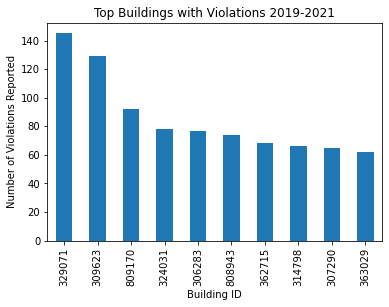

In [43]:
bv_sd_counts2 = bv_sd2["BuildingID"].value_counts().head(10)
bv_sd_counts2.plot(kind = "bar")
plt.title("Top Buildings with Violations 2019-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2014 and 2021 are:<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
809170<br>
324031<br>
306283<br>
808943<br>
362715<br>
314798<br>
307290<br>
363029<br>

---------------------

In [50]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_2years['StatusDate'] = pd.to_datetime(bv_2years['StatusDate'])
bv_2years["StatusDateMonth"] = bv_2years["StatusDate"].dt.month
month_counts2 = bv_2years["StatusDateMonth"].value_counts()
month_counts2.index = month_counts2.index.map(month)
month_counts2

<ipython-input-50-dd235c417909>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv_2years['StatusDate'] = pd.to_datetime(bv_2years['StatusDate'])
<ipython-input-50-dd235c417909>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv_2years["StatusDateMonth"] = bv_2years["StatusDate"].dt.month


January      6001
February     5026
March        4719
December     4380
November     3931
April        3400
October      2831
July         2258
June         2186
August       2178
May          2096
September    1975
Name: StatusDateMonth, dtype: int64

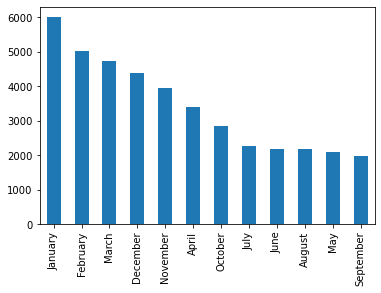

In [51]:
month_counts2.plot(kind = "bar")